# Analysis of US Gun Data and Census

### By Chukwuma Festus


## Outline

* Project Background
* Data Wrangling
* Exploratory Data Analysis
* Conclusion

### Project Background

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

The NICS data is originally found in one sheet of an .xlsx file which has now been coverted to a .csv file. It contains the number of firearm checks by month, state, and type.
The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

Questions this project seeks to find answers to include:
* What census data is most associated with high gun per capita?
* Which states have had the highest growth in gun background checks?
* What is the overall trend of gun background checks?

### Data Wrangling

In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [2]:
# Load data sets
df_gun_data = pd.read_csv('nics_checks.csv')
df_census_data = pd.read_csv('us_census_data.csv')

First we start we the gun data set

In [3]:
#Exploring the gun_data
#Let's see what it looks like
df_gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2022-04,Alabama,16150.0,236.0,20593.0,12513.0,1249.0,1041,0.0,21.0,...,0.0,0.0,0.0,16.0,19.0,4.0,0.0,1.0,0.0,54956
1,2022-04,Alaska,354.0,19.0,3425.0,2946.0,391.0,192,0.0,2.0,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,7589
2,2022-04,Arizona,25746.0,1305.0,20628.0,9300.0,1814.0,1253,0.0,7.0,...,0.0,0.0,0.0,16.0,10.0,0.0,0.0,0.0,0.0,61899
3,2022-04,Arkansas,2043.0,364.0,7659.0,5376.0,483.0,390,4.0,3.0,...,0.0,0.0,0.0,12.0,7.0,2.0,0.0,0.0,0.0,18222
4,2022-04,California,17944.0,12972.0,38217.0,25572.0,5595.0,5,1.0,1.0,...,158.0,0.0,0.0,7491.0,3186.0,698.0,23.0,7.0,0.0,116208


In [4]:
#Let's see total number of rows and columns
df_gun_data.shape

(15510, 27)

In [5]:
#Let's get an overview of the non null values and data type for the gun data
df_gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15510 entries, 0 to 15509
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      15510 non-null  object 
 1   state                      15510 non-null  object 
 2   permit                     15486 non-null  float64
 3   permit_recheck             4125 non-null   float64
 4   handgun                    15490 non-null  float64
 5   long_gun                   15491 non-null  float64
 6   other                      8525 non-null   float64
 7   multiple                   15510 non-null  int64  
 8   admin                      15487 non-null  float64
 9   prepawn_handgun            13567 non-null  float64
 10  prepawn_long_gun           13565 non-null  float64
 11  prepawn_other              8140 non-null   float64
 12  redemption_handgun         13570 non-null  float64
 13  redemption_long_gun        13569 non-null  flo

In [6]:
# confirm and view data types for the gun_data
df_gun_data.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [7]:
# confirm and view missing value count for each columns in the gun_data
df_gun_data.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [8]:
# print number of duplicates in the gun data set
print(df_gun_data.duplicated().sum())

0


There are no duplicates in the data set.


From the background on the gun data set, it is clear that integral metrics such as month, state and totals do not have any missing value. Let's drop the other columns and focus on the attributes/columns that are important to our analysis


In [9]:
# dropping all columns except for month, state and totals
# make a copy
df_gun_data_copy = df_gun_data.copy()
# use column numbers to select columns to drop
df_gun_data_copy = df_gun_data_copy[['month', 'state', 'totals']].copy()

df_gun_data_copy.head()

,month,state,totals
0,2022-04,Alabama,54956
1,2022-04,Alaska,7589
2,2022-04,Arizona,61899
3,2022-04,Arkansas,18222
4,2022-04,California,116208


In [10]:
#let's now use this data for further analysis

df_gun_data = df_gun_data_copy

In [11]:
#let's look at the summary stats for the gun data
df_gun_data.describe()

,totals
count,1.551000e+04
mean,2.700583e+04
std,4.988908e+04
min,0.000000e+00
25%,5.174250e+03
50%,1.370900e+04
75%,3.015050e+04
max,1.427917e+06


In [12]:
# On proper examination of the data, we see month column contains the month and the year
# Let's split this column into different columns for month and year 
# First we create a date column from the month column
df_gun_data['date'] = pd.to_datetime(df_gun_data['month'])
df_gun_data.head()

,month,state,totals,date
0,2022-04,Alabama,54956,2022-04-01
1,2022-04,Alaska,7589,2022-04-01
2,2022-04,Arizona,61899,2022-04-01
3,2022-04,Arkansas,18222,2022-04-01
4,2022-04,California,116208,2022-04-01


In [13]:
# Then we create month and year columns from the newly created date column
# Note the new month column will replace the existing month column
# We'll also convert the month to a string for a better visualizations in subsequent analysis 

df_gun_data['month'] = df_gun_data['date'].dt.month 
df_gun_data['year'] = df_gun_data['date'].dt.year
df_gun_data['month_name'] = df_gun_data['date'].dt.strftime('%b')
df_gun_data['month_long_name'] = df_gun_data['date'].dt.strftime('%B')

df_gun_data.head()

,month,state,totals,date,year,month_name,month_long_name
0,4,Alabama,54956,2022-04-01,2022,Apr,April
1,4,Alaska,7589,2022-04-01,2022,Apr,April
2,4,Arizona,61899,2022-04-01,2022,Apr,April
3,4,Arkansas,18222,2022-04-01,2022,Apr,April
4,4,California,116208,2022-04-01,2022,Apr,April


In [14]:
# Let's now drop the date column since it has served it's purpose

drop_columns = df_gun_data.columns.to_list()[3]
df_gun_data.drop(columns = drop_columns, inplace=True)

df_gun_data.head()

,month,state,totals,year,month_name,month_long_name
0,4,Alabama,54956,2022,Apr,April
1,4,Alaska,7589,2022,Apr,April
2,4,Arizona,61899,2022,Apr,April
3,4,Arkansas,18222,2022,Apr,April
4,4,California,116208,2022,Apr,April


In [15]:
# Also let's drop year 2022 as the data is incomplete. It stops in April 2022
# We'll first get the index for year 2022
year_2022 = df_gun_data[df_gun_data['year'] == 2022]

year_2022.index


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            210, 211, 212, 213, 214, 215, 216, 217, 218, 219],
           dtype='int64', length=220)

In [16]:
#Then we'll drop this index

df_gun_data.drop(index = year_2022.index, inplace = True)
df_gun_data.head()

,month,state,totals,year,month_name,month_long_name
220,12,Alabama,92191,2021,Dec,December
221,12,Alaska,7640,2021,Dec,December
222,12,Arizona,47985,2021,Dec,December
223,12,Arkansas,29247,2021,Dec,December
224,12,California,124997,2021,Dec,December


In [17]:
#  Let's rename the totals column to background_checks as it's more understandable this way

df_gun_data.rename(columns = {'totals': 'background_checks'}, inplace = True)
df_gun_data.head()

,month,state,background_checks,year,month_name,month_long_name
220,12,Alabama,92191,2021,Dec,December
221,12,Alaska,7640,2021,Dec,December
222,12,Arizona,47985,2021,Dec,December
223,12,Arkansas,29247,2021,Dec,December
224,12,California,124997,2021,Dec,December


In [18]:
#looking at the table above, it's best to stick with on column for month
# We'll drop month and month_name
df_gun_data.drop(columns=['month', 'month_name'], inplace = True)
df_gun_data.head()

,state,background_checks,year,month_long_name
220,Alabama,92191,2021,December
221,Alaska,7640,2021,December
222,Arizona,47985,2021,December
223,Arkansas,29247,2021,December
224,California,124997,2021,December


In [19]:
#Then we'll rename the month_long_name to month
df_gun_data.rename(columns = {'month_long_name': 'month'}, inplace = True)
df_gun_data.head()

,state,background_checks,year,month
220,Alabama,92191,2021,December
221,Alaska,7640,2021,December
222,Arizona,47985,2021,December
223,Arkansas,29247,2021,December
224,California,124997,2021,December


In [20]:
# Let's confirm the data types for the gun data set
df_gun_data.dtypes

state                object
background_checks     int64
year                  int64
month                object
dtype: object

In [21]:
# Let's see the background checks for all states
df_gun_data.groupby('state')['background_checks'].sum()

state
Alabama                 10042785
Alaska                   1507423
Arizona                  6511062
Arkansas                 4911798
California              25031536
Colorado                 8513541
Connecticut              4058218
Delaware                  745457
District of Columbia       39952
Florida                 18082134
Georgia                 10172268
Guam                       27785
Hawaii                    265668
Idaho                    2990427
Illinois                39619263
Indiana                 14058479
Iowa                     3256839
Kansas                   3502094
Kentucky                47197794
Louisiana                6231051
Maine                    1736055
Mariana Islands             1469
Maryland                 2952230
Massachusetts            3569094
Michigan                10420098
Minnesota                9623637
Mississippi              4834922
Missouri                 9048361
Montana                  2486648
Nebraska                 1497908
Neva

In [22]:
# Let's see the background checks for all states in ascending order
df_gun_data.groupby('state')['background_checks'].sum().sort_values()

state
Mariana Islands             1469
Virgin Islands             22157
Guam                       27785
District of Columbia       39952
Hawaii                    265668
Puerto Rico               364806
Rhode Island              434088
Vermont                   681816
Delaware                  745457
Wyoming                  1208730
North Dakota             1255245
Nebraska                 1497908
Alaska                   1507423
South Dakota             1643819
Maine                    1736055
New Jersey               1758191
New Hampshire            2176758
Nevada                   2429358
Montana                  2486648
New Mexico               2839802
Maryland                 2952230
Idaho                    2990427
Iowa                     3256839
Kansas                   3502094
Massachusetts            3569094
Connecticut              4058218
West Virginia            4216692
Mississippi              4834922
Arkansas                 4911798
Oregon                   5539098
Sout

In [23]:
#let's look at the number of states in the data

df_gun_data.state.nunique()

55

Looks like our gun data set is now properly cleaned. There are no more problems such as incorrect datatype, missing data, duplicates, wrong column names, mismatch of records that needs to be fixed. Let's move on to the census data set.

In [24]:
#Let's look at the census data

df_census_data.head(10)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [25]:
#let's look at the total number of rows and columns
df_census_data.shape

(85, 52)

In [26]:
# Let's get an overview of the non null values and data type for the census data
df_census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [27]:
# view missing value count for each columns in the census data
df_census_data.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [28]:
# Let's look at the tail values to better understand the census data set
df_census_data.tail(30)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
55,"All firms, 2012",NaN,"374,153","68,032","499,926","231,959","3,548,449","547,352","326,693","73,418",...,81314,550453,"2,356,748","251,419","75,827","653,193","541,522","114,435","432,980","62,427"
56,"Men-owned firms, 2012",NaN,"203,604","35,402","245,243","123,158","1,852,580","284,554","187,845","38,328",...,42418,302249,"1,251,696","132,163","41,270","353,012","262,650","63,112","236,252","30,039"
57,"Women-owned firms, 2012",NaN,"137,630","22,141","182,425","75,962","1,320,085","194,508","106,678","23,964",...,23722,195694,"866,678","76,269","23,417","236,290","187,677","39,065","133,859","19,344"
58,"Minority-owned firms, 2012",NaN,"92,219","13,688","135,313","35,982","1,619,857","85,849","56,113","14,440",...,4101,105234,"1,070,392","24,423","2,354","185,043","92,807","5,777","40,507","4,077"
59,"Nonminority-owned firms, 2012",NaN,"272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


In [29]:
# Since the fact note column has 57 missing values and the different states have 20 missing values
# let's drop these column and rows

df_census_data.drop(columns=['Fact Note'], inplace = True)
df_census_data.drop(index = df_census_data.index[65:85], axis = 0, inplace = True)

df_census_data.tail(30)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
35,"Bachelor's degree or higher, percent of person...",23.50%,28.00%,27.50%,21.10%,31.40%,38.10%,37.60%,30.00%,27.30%,...,0.27,0.249,27.60%,31.10%,36.00%,36.30%,32.90%,19.20%,27.80%,25.70%
36,"With a disability, under age 65 years, percent...",11.80%,8.10%,8.20%,12.30%,6.80%,7.20%,7.10%,8.50%,8.50%,...,0.084,0.112,8.10%,6.60%,10.00%,7.70%,8.90%,14.40%,8.20%,8.50%
37,"Persons without health insurance, under age 6...",10.70%,15.50%,11.90%,9.30%,8.30%,8.60%,5.70%,6.60%,15.30%,...,0.103,0.106,18.60%,9.70%,4.50%,10.10%,6.90%,6.50%,6.20%,13.40%
38,"In civilian labor force, total, percent of pop...",58.00%,67.70%,59.30%,58.50%,63.10%,67.60%,67.20%,63.10%,58.80%,...,0.686,0.61,64.30%,67.70%,66.60%,64.70%,63.50%,53.90%,67.10%,67.70%
39,"In civilian labor force, female, percent of po...",53.00%,65.00%,54.50%,53.30%,57.20%,62.60%,62.80%,59.40%,54.70%,...,0.646,0.563,57.70%,59.50%,63.60%,60.80%,58.50%,49.20%,63.50%,62.70%
40,"Total accommodation and food services sales, 2...","7,576,462","2,221,335","13,996,635","4,307,264","90,830,372","13,617,654","9,542,068","2,148,437","49,817,925",...,1873699,12499013,"54,480,811","4,789,281","1,564,272","17,795,901","14,297,278","4,036,333","10,303,256","1,644,844"
41,Total health care and social assistance receip...,"26,039,632","6,375,483","37,055,881","15,792,628","248,953,592","29,488,161","29,573,119","7,003,251","124,061,425",...,6211731,42383683,"145,035,130","14,521,857","4,457,996","47,705,003","43,966,889","12,259,395","40,680,625","3,291,478"
42,"Total manufacturers shipments, 2012 ($1,000)","124,809,759",D,"51,243,473","62,712,925","512,303,164","50,447,098","55,160,095","22,597,384","96,924,106",...,16882647,139960482,"702,603,073","50,046,429","9,315,494","96,389,872","131,530,601","24,553,072","177,728,926","10,783,794"
43,"Total merchant wholesaler sales, 2012 ($1,000)","57,746,565","5,216,303","69,437,272","31,256,110","666,652,186","77,034,971","161,962,244","5,628,914","252,626,608",...,20411059,111718421,"691,242,607","30,927,885","6,450,076","86,613,641","83,313,366","14,295,437","77,066,883","5,597,891"
44,"Total retail sales, 2012 ($1,000)","58,564,965","10,474,275","84,716,542","36,815,256","481,800,461","67,815,200","51,632,467","14,456,001","273,867,145",...,13791827,91641605,"356,116,376","38,024,486","9,933,751","110,002,385","118,924,049","22,637,923","78,201,822","9,446,043"


In [30]:
#Lets's change the configuration, making the states as rows and facts as columns

df_census_data.rename(columns={'Fact':''}, inplace = True) #renamed this column to empty to make the column names appear consistent
df_census_data.set_index('', inplace = True)
df_census_data = df_census_data.swapaxes('index', 'columns')
df_census_data

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,10.70%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


In [31]:
#Then we'll add the index column back to see what we're working with
df_census_data.reset_index(inplace=True)
df_census_data.rename(columns={'index':'state'}, inplace = True)
df_census_data


,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
5,Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
6,Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
7,Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
8,Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
9,Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


In [32]:
# To make the column names consistent with our gun data set
#let's replace spaces and special chracters with underscores and lowercase labels for the census dataset
df_census_data.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-", "_").replace(",", "_").replace("(", "_").replace(")", ""), inplace=True)
df_census_data

,state,population_estimates__july_1__2016____v2016,population_estimates_base__april_1__2010____v2016,population__percent_change___april_1__2010__estimates_base_to_july_1__2016____v2016,population__census__april_1__2010,persons_under_5_years__percent__july_1__2016____v2016,persons_under_5_years__percent__april_1__2010,persons_under_18_years__percent__july_1__2016____v2016,persons_under_18_years__percent__april_1__2010,persons_65_years_and_over__percent___july_1__2016____v2016,...,all_firms__2012,men_owned_firms__2012,women_owned_firms__2012,minority_owned_firms__2012,nonminority_owned_firms__2012,veteran_owned_firms__2012,nonveteran_owned_firms__2012,population_per_square_mile__2010,land_area_in_square_miles__2010,fips_code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
5,Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
6,Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
7,Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
8,Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
9,Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


In [33]:
#Looking at the data set above, there are columns with multiple underscores, let's remove these
df_census_data.rename(columns=lambda x: x.strip().replace("____", "_").replace("___", "_").replace("__", "_"), inplace=True)
df_census_data

,state,population_estimates_july_1_2016_v2016,population_estimates_base_april_1_2010_v2016,population_percent_change_april_1_2010_estimates_base_to_july_1_2016_v2016,population_census_april_1_2010,persons_under_5_years_percent_july_1_2016_v2016,persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_july_1_2016_v2016,persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent_july_1_2016_v2016,...,all_firms_2012,men_owned_firms_2012,women_owned_firms_2012,minority_owned_firms_2012,nonminority_owned_firms_2012,veteran_owned_firms_2012,nonveteran_owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010,fips_code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
5,Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
6,Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
7,Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
8,Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
9,Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


In [34]:
#checking for any duplicates
df_census_data.duplicated().sum()

0

In [35]:
#checking the data type for the census dataset
df_census_data.dtypes


state                                                                         object
population_estimates_july_1_2016_v2016                                        object
population_estimates_base_april_1_2010_v2016                                  object
population_percent_change_april_1_2010_estimates_base_to_july_1_2016_v2016    object
population_census_april_1_2010                                                object
                                                                               ...  
veteran_owned_firms_2012                                                      object
nonveteran_owned_firms_2012                                                   object
population_per_square_mile_2010                                               object
land_area_in_square_miles_2010                                                object
fips_code                                                                     object
Length: 66, dtype: object

In [36]:
# Since we're in 2022, it's best we work with the census count that is closest to our current year
# So let's drop all the columns except for the 2016 population estimates
df_census_data.drop(columns = df_census_data.columns.to_list()[2:], inplace = True)

df_census_data.head()

,state,population_estimates_july_1_2016_v2016
0,Alabama,"4,863,300"
1,Alaska,"741,894"
2,Arizona,"6,931,071"
3,Arkansas,"2,988,248"
4,California,"39,250,017"


In [37]:
#  On second thought, Let's rename the 2016 population column 

df_census_data.rename(columns = {'population_estimates_july_1_2016_v2016': 'population_2016'}, inplace = True)
df_census_data.head()

,state,population_2016
0,Alabama,"4,863,300"
1,Alaska,"741,894"
2,Arizona,"6,931,071"
3,Arkansas,"2,988,248"
4,California,"39,250,017"


In [38]:
#Let's confirm the non-null values and data types for our census data
df_census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            50 non-null     object
 1   population_2016  50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


In [39]:
#Let's convert the data type to integer so it's consistent with our gun data
# Before we convert to integer, we have to remove the comma signs in the strings
remove_comma_in_columns = df_census_data.columns.to_list()
for c in remove_comma_in_columns:
  df_census_data[c] = df_census_data[c].apply(lambda x: x.strip().replace(',',''))
df_census_data['population_2016'] = df_census_data['population_2016'].astype('int')
df_census_data.dtypes


state              object
population_2016     int32
dtype: object

In [40]:
#viewing the census data frame again
df_census_data.head()

,state,population_2016
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017


Looks like our gun and census data sets are both clean. We will proceed to EDA.

### Exploratory Data Analysis

We will begin answering questions posed at the start of this project.

#### Monthly and Yearly trends for background checks

In [41]:
def myGrpPlot (df, grpVar, yVar, stat = 'sum', sort = None):
    '''
    This function takes inputs of the details of chart we intend to plot and outputs a chart
    '''
    # Plot
    # data preparation
    data = df.groupby([grpVar])[yVar].agg(stat).reindex(index=sort).reset_index()
    # set plot dimensions 
    plt.figure(figsize=[14, 6])
    sns.barplot(x=grpVar, y=yVar, data=data, edgecolor='black')
    # tidying up labels after plotting
    grpVar=grpVar.replace("_"," ") # replace _ with a space
    yVar=yVar.replace("_"," ") # replace _ with a space
    # add title and format it
    plt.title(f'{stat} of {yVar} by {grpVar}'.title(), fontsize=14, weight="bold")
    # add x label and format it
    plt.xlabel(grpVar.title(), fontsize = 10, weight = "bold")
    # add y label and format it
    plt.ylabel(f'{stat} of {yVar}'.title(), fontsize=10, weight="bold")
    

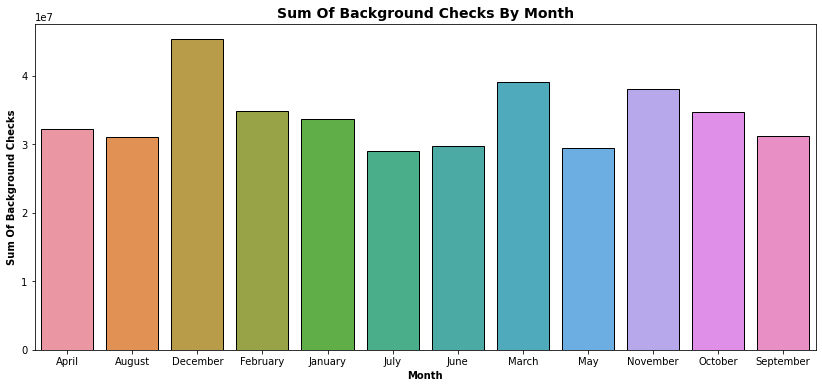

In [42]:
# apply defined function and plot monthly trend of background checks
myGrpPlot(df_gun_data, 'month', 'background_checks')

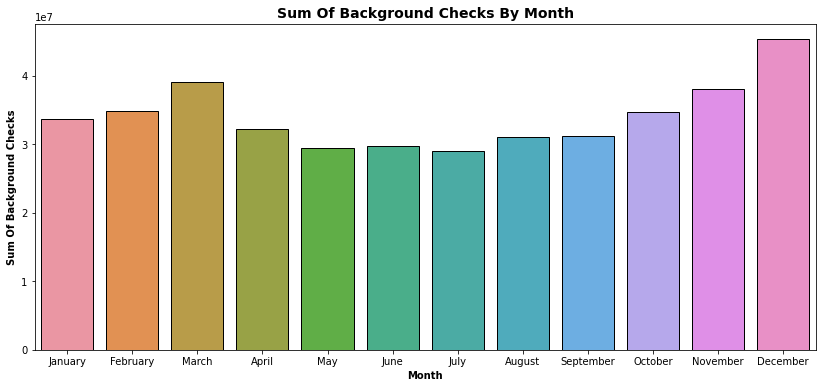

In [43]:
#let's sort the plot above according to the months of the year
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

myGrpPlot(df_gun_data, 'month', 'background_checks', sort=month_order)

It can be seen from the monthly trends chart that December has the highest number of background checks. July has the least background checks.

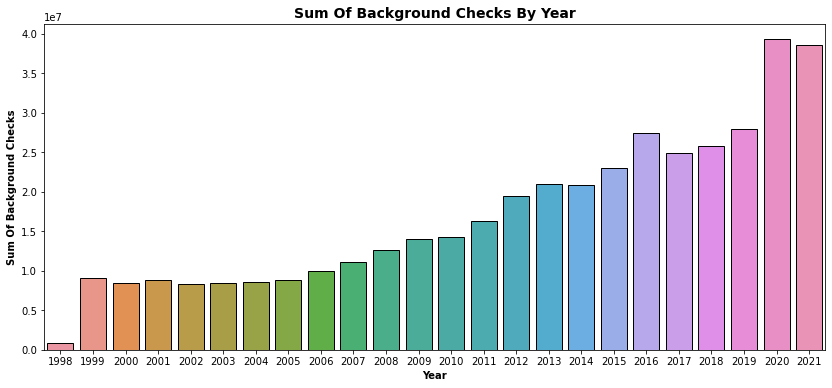

In [44]:
# show trends by year using bar plot
myGrpPlot(df_gun_data, 'year', 'background_checks')

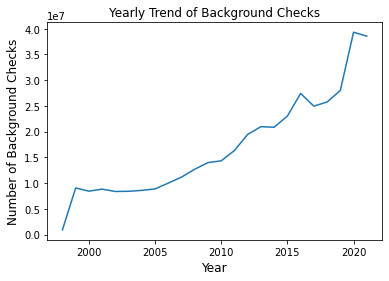

In [45]:
# show trends by year using line plot
yearly_trend = df_gun_data.groupby(['year'])['background_checks'].sum()

yearly_trend = yearly_trend.reset_index(drop=False).sort_values(by = 'background_checks')
# make lineplot
sns.lineplot(x='year', 
            y='background_checks', 
            data=yearly_trend)
# set labels
plt.xlabel('Year', size=12)
plt.ylabel('Number of Background Checks', size=12)
plt.title('Yearly Trend of Background Checks', size=12)
plt.show()

It can be seen that as the years go by the number of background checks conducted increase. Exceptions can be seen in 2013, 2016 and 2020 where the number of background checks carried out reduced slightly the following year. Overall the trend grows with each passing year.

#### States with highest gun per capita


In [46]:
# create a new gun data frame to be merged with the census data in order to carry out further analysis

df_new_gun_data = df_gun_data.groupby(['state'])['background_checks'].sum()
df_new_gun_data = df_new_gun_data.reset_index(drop=False)
df_new_gun_data.head()

,state,background_checks
0,Alabama,10042785
1,Alaska,1507423
2,Arizona,6511062
3,Arkansas,4911798
4,California,25031536


In [47]:
# Create a new census data frame from the existing one

df_new_census_data = df_census_data
df_new_census_data.head()

,state,population_2016
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017


In [48]:
# combine the dataframes using the panda's merge function 

df_combined = df_new_gun_data.merge(df_new_census_data, on = 'state', how = 'inner')
df_combined.head()

,state,background_checks,population_2016
0,Alabama,10042785,4863300
1,Alaska,1507423,741894
2,Arizona,6511062,6931071
3,Arkansas,4911798,2988248
4,California,25031536,39250017


In [49]:
df_combined.tail()

,state,background_checks,population_2016
45,Virginia,8500886,8411808
46,Washington,9297461,7288000
47,West Virginia,4216692,1831102
48,Wisconsin,7676390,5778708
49,Wyoming,1208730,585501


In [50]:
# create a column for gun checks per capita

df_combined['gun_per_capita'] = df_combined['background_checks']/df_combined['population_2016']
df_combined.head()

,state,background_checks,population_2016,gun_per_capita
0,Alabama,10042785,4863300,2.065014
1,Alaska,1507423,741894,2.031858
2,Arizona,6511062,6931071,0.939402
3,Arkansas,4911798,2988248,1.643705
4,California,25031536,39250017,0.637746


In [51]:
# let's identify the state with highest gun per capita

max_gun = df_combined['gun_per_capita'].max()

df_combined.loc[lambda df_combined: df_combined['gun_per_capita'] == max_gun]

,state,background_checks,population_2016,gun_per_capita
16,Kentucky,47197794,4436974,10.637383


Kentucky is the state with highest gun per capita.


#### Background checks for states and growth rates

In [52]:
# let us look at the total background checks for each states on an annual basis

df_new_gun_data_2 = df_gun_data.groupby(['year', 'state'])['background_checks'].sum()
df_new_gun_data_2 = df_new_gun_data_2.reset_index(drop=False)
df_new_gun_data_2.head()

,year,state,background_checks
0,1998,Alabama,36568
1,1998,Alaska,3985
2,1998,Arizona,17453
3,1998,Arkansas,21752
4,1998,California,67445


In [53]:
# lets's copy the data for 1998 for all states to a separate data frame (first 55 data)
df_gun_data_1998 = df_new_gun_data_2.head(55).copy()

# Then we'll rename the column name to make it understable

df_gun_data_1998.rename(columns = {'background_checks': 'background_checks_1998', 'year':'year_1998'}, inplace = True)
df_gun_data_1998.head()


,year_1998,state,background_checks_1998
0,1998,Alabama,36568
1,1998,Alaska,3985
2,1998,Arizona,17453
3,1998,Arkansas,21752
4,1998,California,67445


In [54]:
# let's now look at all background checks by states from 1998 to 2021

df_total_checks = df_gun_data.groupby(['state'])['background_checks'].sum()
df_total_checks = df_total_checks.reset_index(drop=False)

# we will assign this to a new data frame and rename this frame

df_total_checks.rename(columns = {'background_checks': 'total_background_checks'}, inplace = True)
df_total_checks.head()


,state,total_background_checks
0,Alabama,10042785
1,Alaska,1507423
2,Arizona,6511062
3,Arkansas,4911798
4,California,25031536


In [55]:
# Let's now merge the two newly created data frames to see the year trends

df_year_combined = df_gun_data_1998.merge(df_total_checks, on = 'state', how = 'inner')
df_year_combined.head()

,year_1998,state,background_checks_1998,total_background_checks
0,1998,Alabama,36568,10042785
1,1998,Alaska,3985,1507423
2,1998,Arizona,17453,6511062
3,1998,Arkansas,21752,4911798
4,1998,California,67445,25031536


In [56]:
# Then we'll drop the column for year 1998 since it is no longer important for this analysis

df_year_combined.drop(columns = ['year_1998'], inplace = True)
df_year_combined.head(55)

,state,background_checks_1998,total_background_checks
0,Alabama,36568,10042785
1,Alaska,3985,1507423
2,Arizona,17453,6511062
3,Arkansas,21752,4911798
4,California,67445,25031536
5,Colorado,23798,8513541
6,Connecticut,6870,4058218
7,Delaware,2135,745457
8,District of Columbia,0,39952
9,Florida,32341,18082134


In [57]:
# since we'll be carrying out analysis to show growth rate in which division is involved
# It is best to take out states where background checks is zero
zero_background_check = df_year_combined[df_year_combined['background_checks_1998'] == 0]

zero_background_check.index

Int64Index([8, 21, 49], dtype='int64')

In [58]:
# Then we'll delete this rows using the indexes

df_year_combined.drop(index = zero_background_check.index, inplace = True)
df_year_combined.head()

,state,background_checks_1998,total_background_checks
0,Alabama,36568,10042785
1,Alaska,3985,1507423
2,Arizona,17453,6511062
3,Arkansas,21752,4911798
4,California,67445,25031536


In [59]:
# Let's now create another column to show the growth from 1998 to 2021

df_year_combined['growth_from_1998'] = df_year_combined['total_background_checks'] - df_year_combined['background_checks_1998']
df_year_combined.head()

,state,background_checks_1998,total_background_checks,growth_from_1998
0,Alabama,36568,10042785,10006217
1,Alaska,3985,1507423,1503438
2,Arizona,17453,6511062,6493609
3,Arkansas,21752,4911798,4890046
4,California,67445,25031536,24964091


In [60]:
# Let's see the state that has shown the highest growth

max_growth_state = df_year_combined['growth_from_1998'].max()

df_year_combined.loc[lambda df_year_combined: df_year_combined['growth_from_1998'] == max_growth_state]

,state,background_checks_1998,total_background_checks,growth_from_1998
18,Kentucky,31869,47197794,47165925


Kentucky is the state that has shown the highest growth.

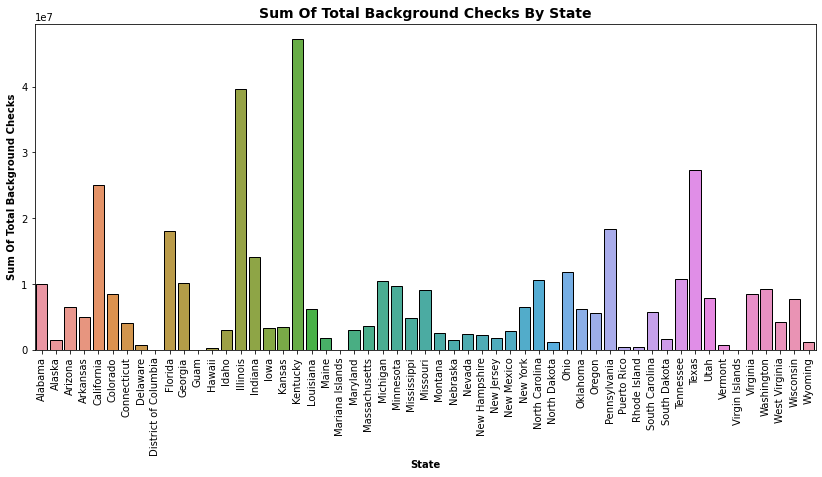

In [61]:
# To show overall trend of backgroung checks by state
#Let's list the states in order
state_order=sorted(df_gun_data['state'].unique())

#sort months
myGrpPlot(df_year_combined, 'state', 'total_background_checks', sort=state_order)
plt.xticks(rotation=90);

It can be seen that Kentucky is the state with the highest number of background checks and Guam is the state with the least.

In [62]:
# Let's add another column to show the growth rate in percentage

df_year_combined['percentage_growth'] = (df_year_combined['growth_from_1998']/df_year_combined['background_checks_1998']) * 100
df_year_combined.head()

,state,background_checks_1998,total_background_checks,growth_from_1998,percentage_growth
0,Alabama,36568,10042785,10006217,27363.314920
1,Alaska,3985,1507423,1503438,37727.427854
2,Arizona,17453,6511062,6493609,37206.262534
3,Arkansas,21752,4911798,4890046,22480.902905
4,California,67445,25031536,24964091,37013.998073


In [63]:
# Let's see the state that has shown the highest percentage growth rate 

max_percentage_growth_rate = df_year_combined['percentage_growth'].max()

df_year_combined.loc[lambda df_year_combined: df_year_combined['percentage_growth'] == max_percentage_growth_rate]


,state,background_checks_1998,total_background_checks,growth_from_1998,percentage_growth
11,Guam,9,27785,27776,308622.222222


Guam is the state that has shown the highest percentage growth rate.

In [64]:
# Let's see the state that has shown the highest percentage growth rate 
min_percentage_growth_rate = df_year_combined['percentage_growth'].min()

df_year_combined.loc[lambda df_year_combined: df_year_combined['percentage_growth'] == min_percentage_growth_rate]


,state,background_checks_1998,total_background_checks,growth_from_1998,percentage_growth
26,Mississippi,26097,4834922,4808825,18426.734874


Mississipi is the state that has shown the least percentage growth rate .

### Conclusion

It can be concluded from the analysis of US FBI Gun Data and US Census Data from 1998 to 2021 that:

* From the trend charts, we can see that month with the highest gun background checks is December. As for the years, we can see that there is an overall continuous increase from 1998 to 2021.

* Kentucky is the state with the highest gun per capita with 10.63. Also Kentucky has the highest growth rate with respect to background checks. This value is 47,165,925.

* The overall trend of background checks shows Guam has the lowest checks and Kentucky has the highest checks.

* The state with highest percentage growth in checks in Guam with 308,622% while Mississipi has the lowest growtyh rate with 18,427%



### Limitations

* It is important to note that the statistics within this chart represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.

* The census population data used was that of 2016 estimates. Use of 2021 census data would make the results more accurate.

* There is no statistical inference performed in this analysis (to test the significance of the results found).